In [57]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Country_clusters
df = pd.read_csv('Country_clusters.csv')
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

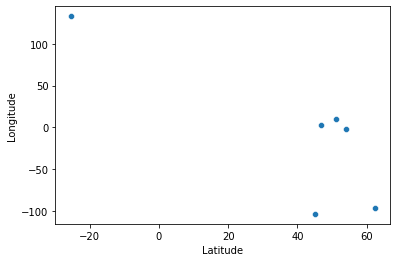

In [5]:
sns.scatterplot(x = df['Latitude'], y =df['Longitude'])

In [7]:
x = df[['Latitude','Longitude']]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [59]:
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled,columns=x.columns)
x

,Latitude,Longitude
0,0.204344,-1.193114
1,0.798128,-1.104870
2,0.264983,0.151062
3,0.512308,0.088645
4,0.414877,0.252347
5,-2.194639,1.805930


# Model training 

In [63]:
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(x)
wcss= kmeans_model.inertia_
wcss

0.22487761024739528

In [64]:
y_var = kmeans_model.fit_predict(x)
y_var

array([2, 2, 0, 0, 0, 1])

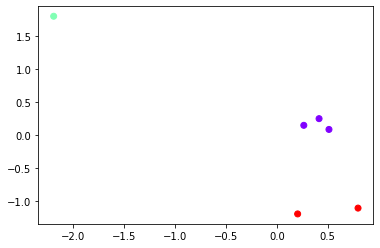

In [66]:
plt.scatter(x['Latitude'], x['Longitude'], c = y_var, cmap='rainbow' )

In [68]:
kmeans_model.cluster_centers_

array([[ 0.39738895,  0.16401816],
       [-2.19463851,  1.80593003],
       [ 0.50123584, -1.14899226]])

In [69]:
x

,Latitude,Longitude
0,0.204344,-1.193114
1,0.798128,-1.104870
2,0.264983,0.151062
3,0.512308,0.088645
4,0.414877,0.252347
5,-2.194639,1.805930


# WCSS

In [70]:
wcss= kmeans_model.inertia_
wcss

0.22487761024739528

In [71]:
wcss_list = []
for k in range(1,7):
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(x)
    wcss = kmeans_model.inertia_
    wcss_list.append(wcss)
    print(f'k == {k} and WCSS == {wcss}')
# wcss_list

k == 1 and WCSS == 12.000000000000002
k == 2 and WCSS == 2.306614239650664
k == 3 and WCSS == 0.22487761024739528
k == 4 and WCSS == 0.04469440405562376
k == 5 and WCSS == 0.016363388749074958
k == 6 and WCSS == 0.0


Text(0, 0.5, 'WCSS')

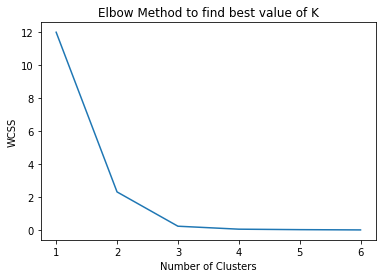

In [72]:
k = range(1,7)
plt.title('Elbow Method to find best value of K')
plt.plot(k,wcss_list)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')